In [1]:
import numpy as np
import matplotlib
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# 1. Model definitions

Using the data from example 3-3-2, what happens if we train with our sigmoid model defined in example 3-4-3?
First remind us of the data we would like to fit

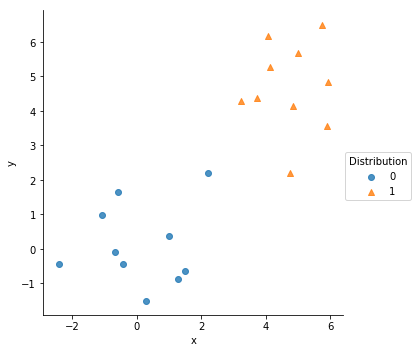

In [2]:
rng = np.random.RandomState(123)
d = 2
N = 10
mean = 5
x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])
x = np.concatenate((x1, x2), axis=0)
x_df = pd.DataFrame(x, columns = ['x', 'y'])
x_df['Distribution'] = N*[0] + N*[1]

g = sns.lmplot(x='x', y='y', data=x_df, hue='Distribution', 
               markers=["o", "^"], fit_reg=False)


 Now bring on the definitions to fit in the previous model.

In [3]:
Xp = x
Yp = np.array(x_df.Distribution)
Yp = np.expand_dims(Yp, 1)

In [4]:

tf.set_random_seed(0)
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))
#a = tf.Variable(tf.zeros([1]))


x = tf.placeholder(tf.float32, shape=[None, 2]) # Only fix the number of columns.
t = tf.placeholder(tf.float32, shape=[None, 1]) 
y = tf.nn.sigmoid(tf.matmul(x,w) + b)

regterm = tf.nn.l2_loss(w)

cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t)* tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy - regterm)

correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [8]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
writer.close()

# 2. Model Training

In [5]:
# Initialization
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Learning
for epoch in range(2000):
    sess.run(train_step, feed_dict={
            x: Xp,
            t: Yp
        })
    
weights =  w.eval(session = sess)
print(weights)

[[ nan]
 [ nan]]


In [13]:
#sess = tf.InteractiveSession()
w.eval()

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]

# 3. Check your result

In [ ]:
classified = correct_prediction.eval(session = sess, feed_dict={
        x: Xp,
        t: Yp
    })
prob = y.eval(session = sess, feed_dict={
        x: Xp
    })

weights =  w.eval(session = sess)

print('classified')
print(classified)
print()
print('output probability')
print(prob)
print('weights')
print(weights)